- **Business understanding**

Build a Machine Learning template to determine if an employee will stay or leave the company. We’re dealing with a classification issue. We will use two of the most used algorithms to solve this problem: Neural Network and Logistic Regression.

**Turnover** designates in an enterprise the renewal of the workforce, following recruitment and departures of the staff. It is a valuable indicator which can quite easily reflect the work environment within the company. Machine Learning can help to analyze and predict this rate and thus make the Right decisions.

In [1]:
#importing the algorithme library
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#The others library
from  sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection

#this library import all library like pandas, numpy, matplotlib,seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Evaluate our algorithme
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,classification_report

In [2]:
data = pd.read_csv('/kaggle/input/ibm-attrition-analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# list of numeric variable
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of variable numeric: ', len(num_vars))

# show
data[num_vars].head()

Number of variable numeric:  26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# list of categorical variable
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of variable categoric: ', len(cat_vars))

# show
data[cat_vars].head()

Number of variable categoric:  9


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [9]:
#display each values for each variable
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

Attrition 2  categories
BusinessTravel 3  categories
Department 3  categories
EducationField 6  categories
Gender 2  categories
JobRole 9  categories
MaritalStatus 3  categories
Over18 1  categories
OverTime 2  categories


In [10]:
data["Age"].mode()
data["Age"].mean()

36.923809523809524

In [11]:
#Calculate the %(move) and %(stay) in Dataset
move = data[data['Attrition'] == "Yes"]
stay = data[data['Attrition'] == "No"]
print("moves: %i (%.1f%%)" %(len(move),(len(move)) / len(data)*100))
print("stay: %i (%.1f%%)" %(len(stay),(len(stay)) / len(data)*100))
print("Total: %i" %len(data))

moves: 237 (16.1%)
stay: 1233 (83.9%)
Total: 1470


The enterprise recorded only 237 departures either **16.1%** against 1233 or **(83.9%)** out of a total of 1470. For the modelling of our model we can say gold and already that the dataset is unbalanced. In the following sections, if necessary, we will use the **smote()** technique to balance the dataset in order to make it efficient in order to have a better **accuracy**.

- **Data Viz**

As a Data Scientist, your job is not only to interpret and analyze the data, but also to communicate and present your findings. That’s why it’s very important for you to have those skills.

Text(0.5, 1.0, '% Statistique RH')

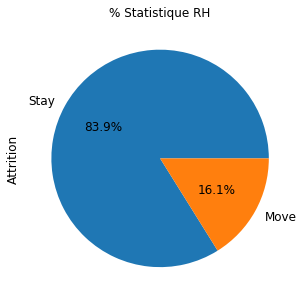

In [12]:
#Viz
import matplotlib.ticker as mtick
ax = (data['Attrition'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Stay', 'Move'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Attrition',fontsize = 12)
ax.set_title('% Statistique RH', fontsize = 12)

Let’s create some interesting viz on the impact of attritions compared to other variables

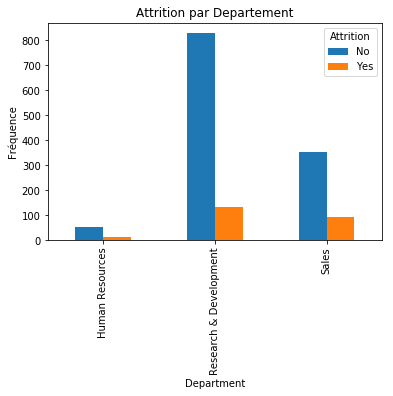

In [13]:
pd.crosstab(data["Department"],data["Attrition"]).plot(kind='bar')
plt.title('Attrition par Departement')
plt.xlabel('Department')
plt.ylabel('Fréquence')
plt.show()

We note more departures in the RD department. This can be explained in the extent that half of the employees are in this department.

In [14]:
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

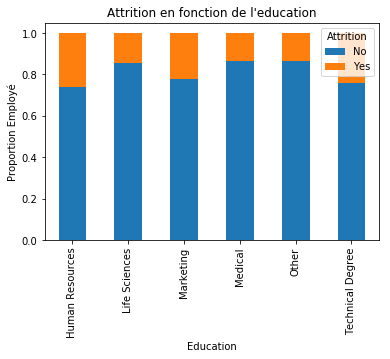

In [15]:
table=pd.crosstab(data["EducationField"], data["Attrition"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Attrition en fonction de l'education")
plt.xlabel('Education')
plt.ylabel('Proportion Employé')
plt.show()

- **Data Processing**


An important part of data science is the manual collection and cleaning of data. This process is also known as Data Wrangling Although exciting it is very important to know that it is a tedious task that can take up 80% of the work of a Data Scientist.

In [16]:
#Identified the nan values
data_nan = pd.isnull(data).sum()
data_nan

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Our dataset is clean. Actually I didn’t expect it. In the real world you probably won’t have data that clean.

Thank you IBM!!!!

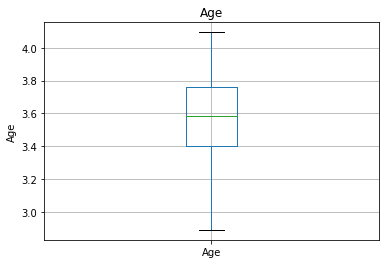

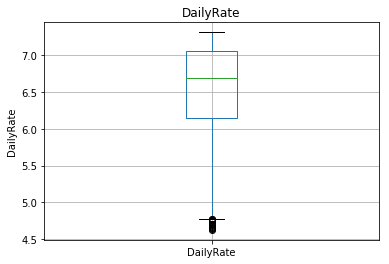

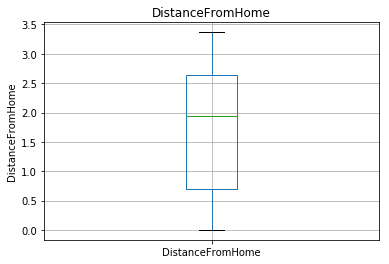

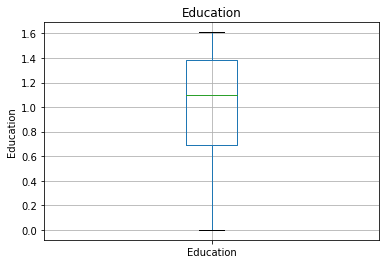

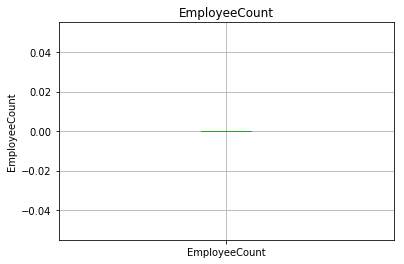

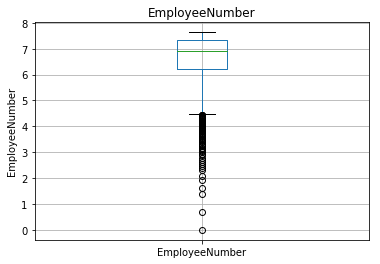

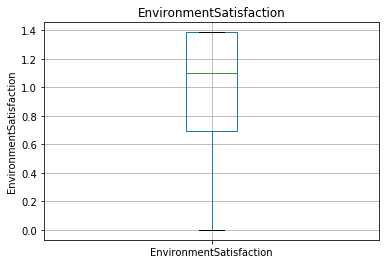

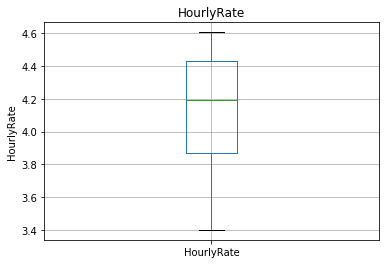

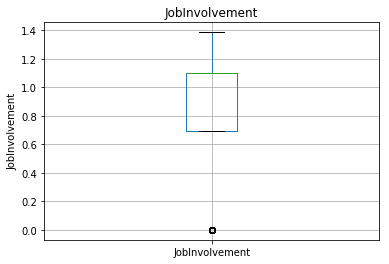

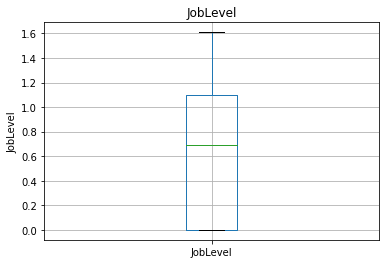

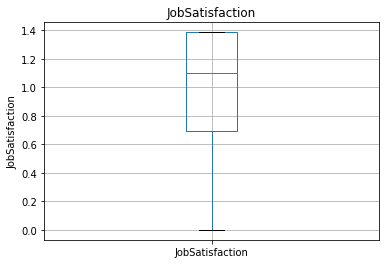

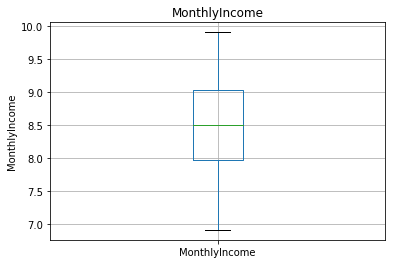

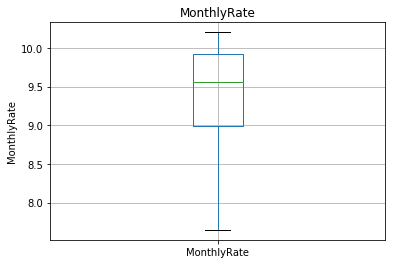

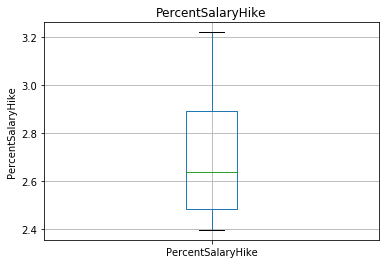

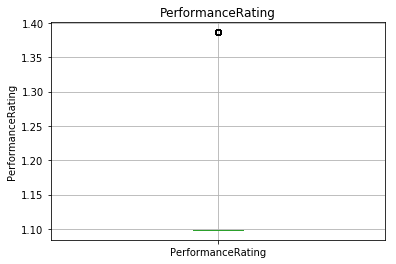

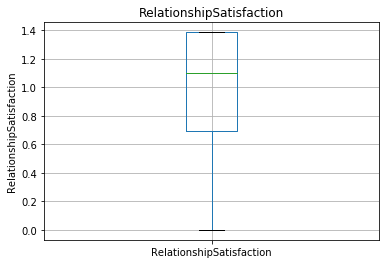

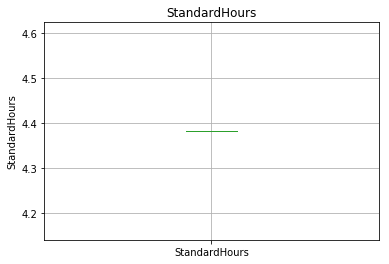

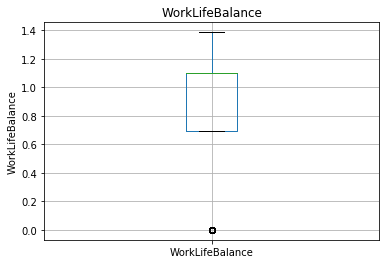

In [17]:
#find the outliers
def find_outliers(df, var):
    df = df.copy()
    
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in num_vars:
    find_outliers(data, var)

Some variables have extremes. This is the case of Dailyrate, Employeenumber. However, it is important to know that the management of its outliers requires an understanding of the business and this is often subjective. From my little experience, I always left its values because they did not interfere with the performance of my models all the more if we make the scaling up In our case, we decide to keep them in our model.

- **Transforming the data in the right format**

We use LabelEncoder technique

In [18]:

lb = LabelEncoder() 
data['Attrition'] = lb.fit_transform(data['Attrition'])
data['BusinessTravel'] = lb.fit_transform(data['BusinessTravel'])
data['Department'] = lb.fit_transform(data['Department'])
data['EducationField'] = lb.fit_transform(data['EducationField'])
data['Gender'] = lb.fit_transform(data['Gender'])
data['JobRole'] = lb.fit_transform(data['JobRole'])
data['MaritalStatus'] = lb.fit_transform(data['MaritalStatus'])
data['Over18'] = lb.fit_transform(data['Over18'])
data['OverTime'] = lb.fit_transform(data['OverTime'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1

it is good, all my categorical variables are transforming in numerical type

In [20]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


- Feature Selection

In [21]:
X = data.drop(["Attrition"], axis = 1)
y = data["Attrition"]

In [22]:
X.shape

(1470, 34)

In [23]:
y.shape

(1470,)

In [24]:
#function for normalizing our data

def normalisation(train_df, test_df):
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    train_df = sc_X.fit_transform(train_df)
    test_df =  sc_X.transform(test_df)
    return train_df, test_df


- Machine Learning

In this section, we will create our **ML models** and also **evaluate them**. 

let’s go

In [25]:
#Split our dataset in train ans test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
X_train.shape

(1102, 34)

In [27]:
X_test.shape

(368, 34)

In [28]:
#Normalize
X_train, X_test = normalisation(X_train, X_test)

- Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_log =  LogisticRegression(solver='liblinear', C = 0.38, max_iter = 200, random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(C=0.38, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#prédict on test set
y_pred_log = classifier_log.predict(X_test)
y_pred_proba = classifier_log.predict_proba(X_test)[:,1]

In [31]:
#score
accurancy_log = round(classifier_log.score(X_test, y_test) * 100)
print(str(accurancy_log )+ ' %')

89.0 %


It’s just amazing. The model has an accuracy of **89%**. 

However, you can always compare the score of the train and the test in order to check if there is not a big gap. I also advise you to explore the cross_val_score method.

- Evaluate LR

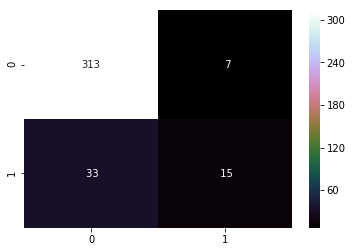

In [32]:
#matrixof confusion
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True,fmt='3.0f',cmap="cubehelix")

The model was wrong on 33 employees. In fact, we call data science the **False Positive**. Nevertheless, 313 employees will remain (**True positive**)

In [33]:
#Classification Report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.68      0.31      0.43        48

    accuracy                           0.89       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.88      0.89      0.87       368



AUC - Test Set: 78.24%


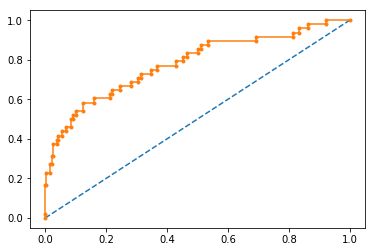

In [34]:
#ROC AUC
probs = classifier_log.predict_proba(X_test)
probs = probs[:, 1]

auc_log = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc_log*100))

# calculons roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Having an **AUC of 78.24%** is not bad at all content of dataset size.

- Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(14,14,14), activation='relu', solver='adam', max_iter=100)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
accurancy_neural = round(mlp.score(X_test, y_test) * 100, 2)
print(str(accurancy_neural) + ' %')

85.87 %


- Evaluate Neural Network


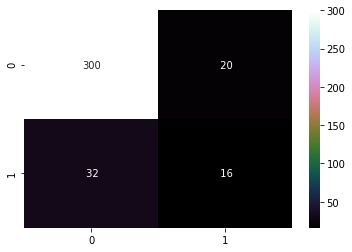

In [37]:
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
import seaborn as sns
sns.heatmap(cm_mlp, annot=True,fmt='3.0f',cmap="cubehelix")

It is clear that neural networks are able to better predict the employees who will leave 18 (True Negative) contrary to logistic regression . In fact, he was wrong only about 30 employees.

However, is this the model to remember?

In [38]:
#classification report
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       320
           1       0.44      0.33      0.38        48

    accuracy                           0.86       368
   macro avg       0.67      0.64      0.65       368
weighted avg       0.84      0.86      0.85       368



AUC - Test Set: 76.08%


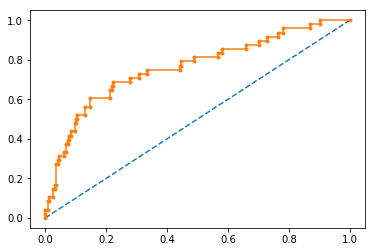

In [39]:
#ROC AUC
probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
auc_mlp = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc_mlp*100))


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

- Resume

In [40]:
Result = pd.DataFrame({
    'Model': ['Logistic Regression','Neural Network', ],
      'Score': [accurancy_log,accurancy_neural]})
Result.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,89.00
1,Neural Network,85.87


In [41]:
#Compare our predictions and real values
Result_logistic = pd.DataFrame({
        "True data": y_test,
        "Predict data": y_pred_log,
        "Proba data":y_pred_proba
    })
#Result_logistic.head(40)

- Conclusion

In view of our results we can think that logistic regression is the best model. However, I would ask you to analyze in depth in order to identify the best model in particular by making a comparison of all metrics (Matrix confusion, ROC curve and classification_rapport.

As for me, I do not want to give my point of view. I am open to your suggestions, contributions and advice and thank you for reading me to the end.
AIDARA Chamsedine

Student in MBA 2 Big Data

Data scientist at Expresso Senegal(Telco Company)

aidarachamsedine10@gmail.com